In [1]:
import matplotlib.pyplot as plt
import numpy as np

from importlib import reload
from neurobiases import TriangularModel, EMSolver, TCSolver, solver_utils, plot

%matplotlib inline

In [8]:
tuning_kwargs, coupling_kwargs, noise_kwargs, stim_kwargs = \
    TriangularModel.generate_kwargs(
        parameter_design='direct_response',
        M=20, N=15, K=1, corr_cluster=0.4, corr_back=0.1,
        tuning_sparsity=0.6, coupling_sparsity=0.5,
        tuning_random_state=2332, coupling_random_state=2332)

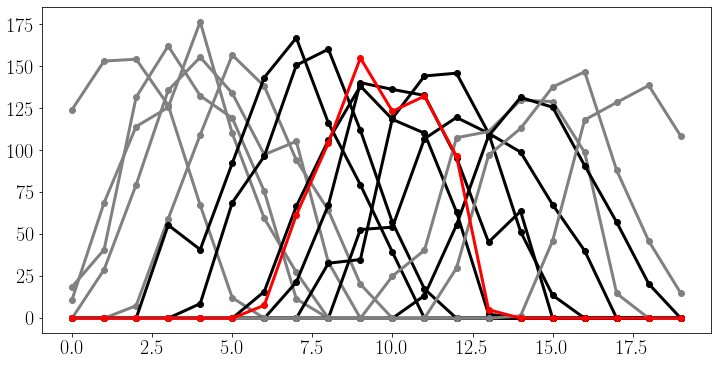

In [9]:
tm = TriangularModel(
    model='linear',
    parameter_design='direct_response',
    tuning_kwargs=tuning_kwargs,
    coupling_kwargs=coupling_kwargs,
    noise_kwargs=noise_kwargs,
    stim_kwargs=stim_kwargs)
tm.plot_tuning_curves(neuron='all')
plt.show()

In [10]:
X, Y, y = tm.generate_samples(n_samples=2000)

In [11]:
solver = EMSolver(X, Y, y, K=1,
                  a_mask=tm.a.ravel() != 0, b_mask=tm.b.ravel() != 0, B_mask=tm.B != 0,
                  max_iter=5000, tol=1e-12)

In [60]:
solver2 = EMSolver(X, Y, y, K=1,
                  max_iter=5000, tol=1e-8)
solver2.fit_em(verbose=False)

In [12]:
mlls = solver.fit_em(verbose=False, mll_curve=True)

In [21]:
tcsolver = TCSolver(X, Y, y, a_mask=tm.a.ravel() != 0, b_mask=tm.b.ravel() != 0)
a_hat, b_hat = tcsolver.fit_ols()

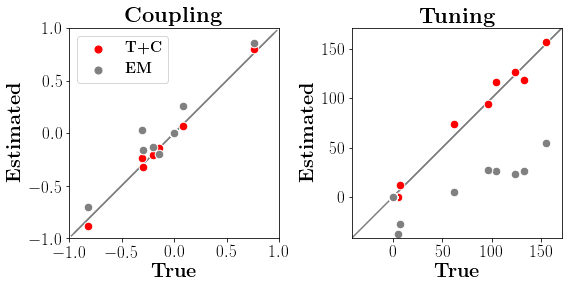

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

fig, axes = solver.plot_tc_fits(tm, color='red', fax=(fig, axes))
plot.plot_tc_fits(a_hat, tm.a.ravel(), b_hat, tm.b.ravel(), fax=(fig, axes),
                  color='gray')

for ax in axes.ravel():
    ax.set_xlabel(r'\textbf{True}', fontsize=20)
    ax.set_ylabel(r'\textbf{Estimated}', fontsize=20)
    ax.tick_params(labelsize=17)
    
axes[0].set_xticks([-1, -0.5, 0, 0.5, 1])
axes[0].set_yticks([-1, -0.5, 0, 0.5, 1])
axes[1].set_xticks([0, 50, 100, 150])
axes[1].set_yticks([0, 50, 100, 150])

axes[0].scatter([], [], color='r', s=50, label=r'\textbf{T+C}')
axes[0].scatter([], [], color='gray', s=50, label=r'\textbf{EM}')
axes[0].set_title(r'\textbf{Coupling}', fontsize=22)
axes[1].set_title(r'\textbf{Tuning}', fontsize=22)

axes[0].legend(loc='best', prop={'size': 15})
plt.tight_layout()
plt.savefig('oracle_selection_em_vs_tc_model.pdf', bbox_inches='tight')

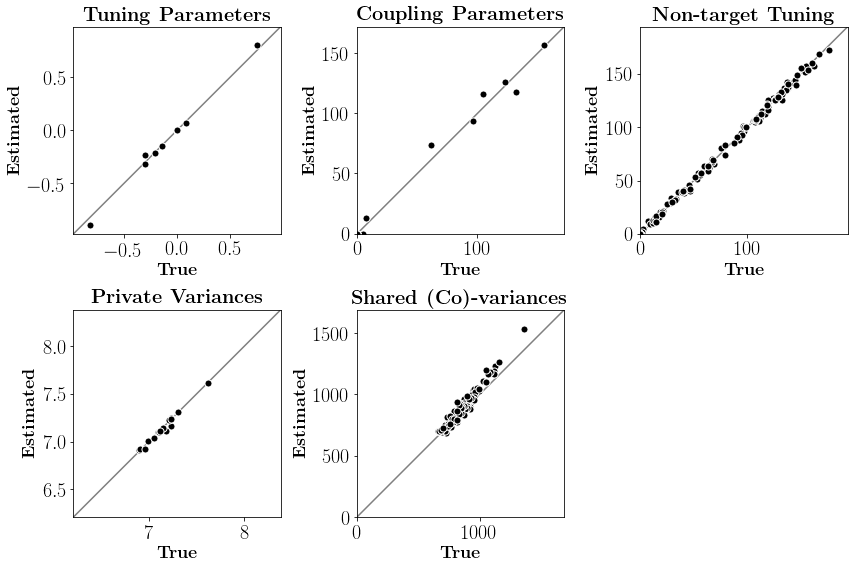

In [25]:
fig, axes = solver.compare_fits(tm, color='black')
plt.tight_layout()